In [1]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()                                        
df = pd.DataFrame(boston["data"],                           #用pd的DataFrame表格功能把boston的data
                  columns=boston["feature_names"])          #---用feature_names的標題 以表格呈現出來

df["ans"] = boston["target"]                                #多增加一行ans 用boston的target這行增加
df.to_csv("boston.csv", encoding="utf-8", index=False)      #存成boston.csv檔名的csv 檔
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [13]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'ans'],
      dtype='object')

CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

MEDV：自住房中位数价格，单位是千元

In [4]:
from sklearn.model_selection import train_test_split
# train_test_split用來將資料分割[90% x, 10% x, 90% y, 10% y]
x_train, x_test, y_train, y_test = train_test_split(boston["data"],
                                                    boston["target"],
                                                    test_size=0.1)
#test_size=0.1的意思是，會把iris["data"]切割成9:1等份，iris["target"]也切成9:1等份

In [6]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)
#引用函式決策樹迴歸 來做分類

In [7]:
reg.fit(x_train, y_train)
#fit 的意思是 讓電腦來學考古資料的(x_train訓練題目,y_train訓練答案)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [10]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)        #predict(測試題目)，把測試題目丟給電腦，電腦回傳做出來的答案
r2_score(y_test,pre)             #不用accuracy_score因為房價沒有正確答案，只有接不接近

0.8067517206424785

[r2_score的用法](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

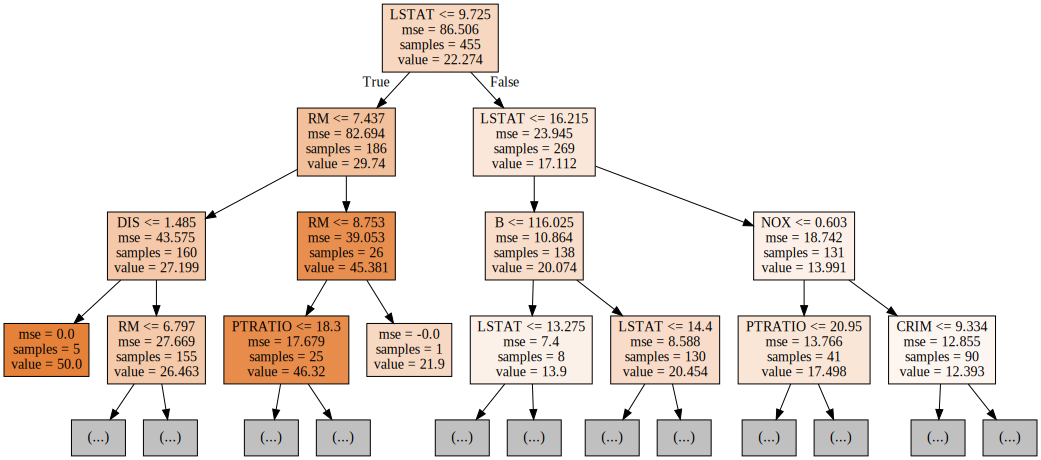

In [9]:
from sklearn.tree import export_graphviz  #把公式轉化成圖形
import graphviz
g = export_graphviz(reg,                                     
                    feature_names=boston["feature_names"],  #會標註出來用什麼標題區分
                    filled=True,                            #在較多的那項以顏色註記
                    max_depth = 3)                          #只顯示幾層
graphviz.Source(g)                                          #把g丟進source並graphviz畫出來